In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [102]:
def clean_dataset(csv):
    
    ## First, ingest the CSV for each business
    print('Resource:', csv)
    
    df = pd.read_csv(csv)
    df.rename(columns={"HE (EST)": "time_est","kWH":"kwh"}, inplace=True)
    
    ## Create a datetimeindex dataframe for ease of use with time series work
    df.index = pd.DatetimeIndex(df.time_est, copy=False)
    df.drop(columns='time_est', inplace=True)
    
    ## Print subset of results for QA
    print("CSV has %s rows and %s column(s)" %(df.shape[0], df.shape[1]))
    
    return df

In [103]:
df = clean_dataset('site_1.csv')

Resource: site_1.csv
CSV has 4896 rows and 1 column(s)


In [104]:
df.index = df.index.floor('D')

df = df.groupby(df.index)['kwh'].sum().reset_index()

df.index = pd.DatetimeIndex(df.time_est, copy=False)
df.drop(columns='time_est', inplace=True)

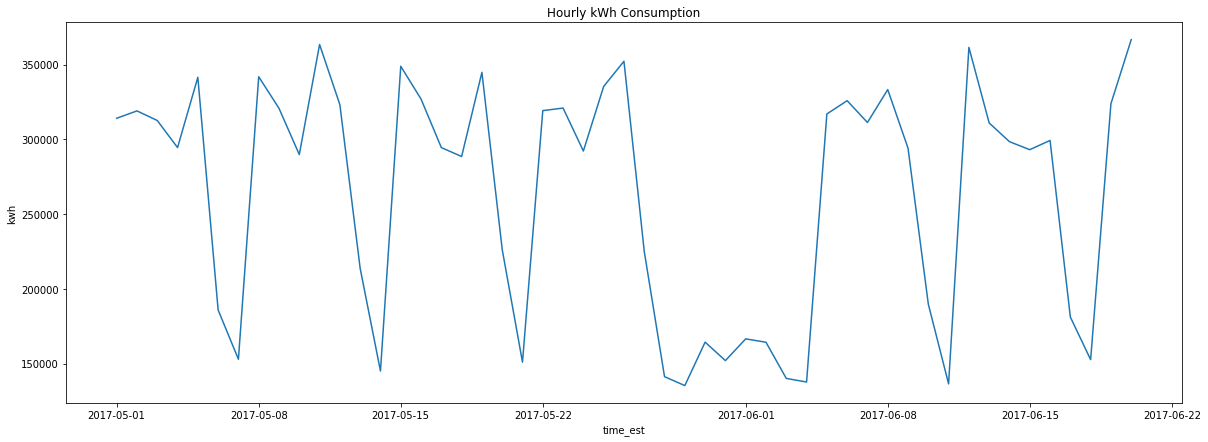

In [105]:
fig, ax = plt.subplots(figsize=(20,7))

sns.lineplot(x=df.index,y='kwh',data=df, ax=ax)
plt.title('Hourly kWh Consumption')
plt.show()

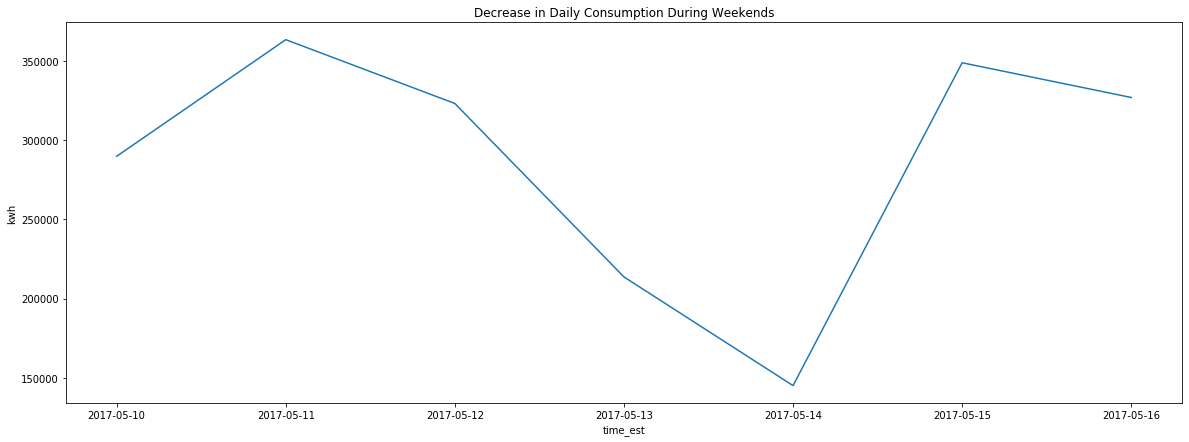

In [106]:
data = df.loc['2017-05-10':'2017-05-16']

fig, ax = plt.subplots(figsize=(20,7))

sns.lineplot(x=data.index,y='kwh',data=data, ax=ax)
plt.title('Decrease in Daily Consumption During Weekends')
plt.show()


These appears to be businesses with most energy use during the weekday. Therefore, I'd suspect they are offices, schools, or places of work that operate during the week.

In [107]:
print('Weekend average consumption:',df[df.index.day_name().isin(['Saturday','Sunday'])]['kwh'].mean())

Weekend average consumption: 169963.45714285714


In [108]:
print('Weekday average consumption:',df[~df.index.day_name().isin(['Saturday','Sunday'])]['kwh'].mean())

Weekday average consumption: 298981.9459459459
